✅ Dataset loaded successfully
Shape: (3900, 18)

🔍 Missing Values
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

✅ Categorical encoding completed

🎯 Target Variable: Purchase Amount (USD)
📌 Number of features: 16

🔗 Top Correlated Features
Review Rating          0.030776
Location               0.028803
Size                   0.027805
Previous Purchases     0.008063
Color                 -0.004326
Item Purchased        -0.005342
Subscription Status   -0.006996
Payment Method        -0.009077
Age                   -0.010424
Gender                -0.0140

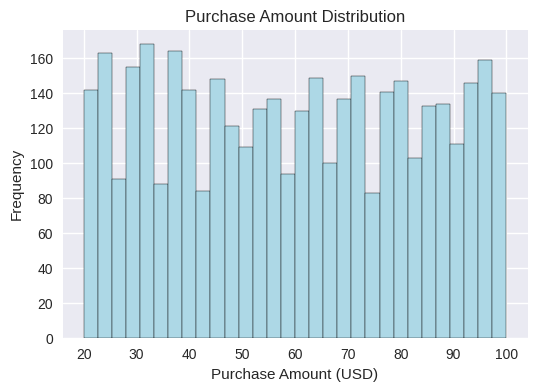

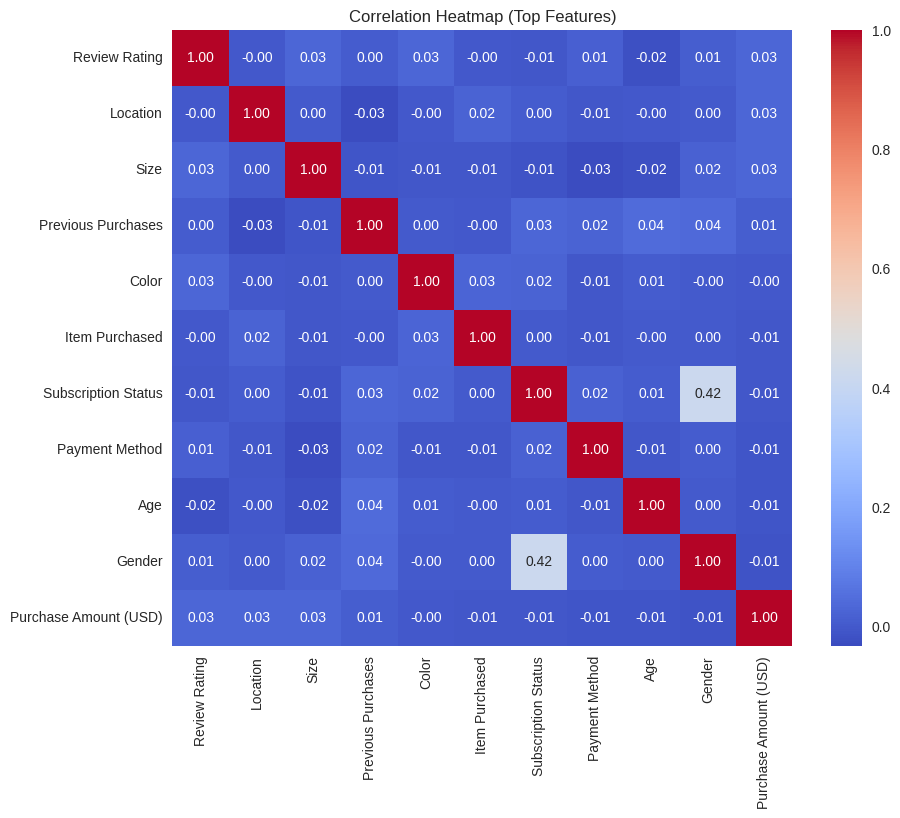


📊 Data Split
Training samples: 3120
Testing samples: 780

🎯 Selected Features
['Age', 'Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']

🤖 Linear Regression model trained

📊 Training Performance
R² Score : 0.0060
RMSE     : $23.60
MAE      : $20.47

📊 Testing Performance
R² Score : -0.0140
RMSE     : $23.82
MAE      : $20.78

🔍 Overfitting Check
R² Difference (Train - Test): 0.0200
✅ Model generalizes well

🏆 Top Important Features
                   Feature  Coefficient  Abs_Coefficient
4                 Location     0.832489         0.832489
5                     Size     0.785737         0.785737
14  Frequency of Purchases    -0.723194         0.723194
8            Review Rating     0.617639         0.617639
13          Payment Method    -0.614750         0.614750
7                   Season    -0.520544         0.52

In [1]:
# ==========================================
# Shopping Sales Prediction - LinearRegression
# ==========================================

# 1️⃣ Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

# 2️⃣ Set visualization style
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

# 3️⃣ Load dataset
df = pd.read_csv("shopping_behavior_updated.csv")
print("✅ Dataset loaded successfully")
print("Shape:", df.shape)

# 4️⃣ Drop non-predictive column
df.drop("Customer ID", axis=1, inplace=True)

# 5️⃣ Check missing values
print("\n🔍 Missing Values")
print(df.isnull().sum())

# 6️⃣ Encode categorical columns
label_cols = df.select_dtypes(include="object").columns
encoder = LabelEncoder()

for col in label_cols:
    df[col] = encoder.fit_transform(df[col])

print("\n✅ Categorical encoding completed")

# 7️⃣ Define features and target
X = df.drop("Purchase Amount (USD)", axis=1)
y = df["Purchase Amount (USD)"]

print("\n🎯 Target Variable: Purchase Amount (USD)")
print("📌 Number of features:", X.shape[1])

# 8️⃣ Save feature names (CRITICAL for future use)
joblib.dump(X.columns.tolist(), "model_features.pkl")

# 9️⃣ Correlation analysis
correlations = df.corr()["Purchase Amount (USD)"].sort_values(ascending=False)
print("\n🔗 Top Correlated Features")
print(correlations[1:11])

# 🔟 Visualization – Histogram
plt.figure(figsize=(6,4))
plt.hist(y, bins=30, color="lightblue", edgecolor="black")
plt.title("Purchase Amount Distribution")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Frequency")
plt.show()

# 1️⃣1️⃣ Visualization – Correlation Heatmap
top_features = correlations.index[1:11]
plt.figure(figsize=(10,8))
sns.heatmap(df[list(top_features) + ["Purchase Amount (USD)"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Top Features)")
plt.show()

# 1️⃣2️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n📊 Data Split")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

# 1️⃣3️⃣ Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1️⃣4️⃣ Feature selection
selector = SelectKBest(score_func=f_regression, k=15)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_features = X.columns[selector.get_support()]
print("\n🎯 Selected Features")
print(list(selected_features))

# 1️⃣5️⃣ Train Linear Regression model
model = LinearRegression()
model.fit(X_train_selected, y_train)
print("\n🤖 Linear Regression model trained")

# 1️⃣6️⃣ Predictions
y_train_pred = model.predict(X_train_selected)
y_test_pred = model.predict(X_test_selected)

# 1️⃣7️⃣ Evaluation function
def evaluate(y_true, y_pred, name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n📊 {name} Performance")
    print(f"R² Score : {r2:.4f}")
    print(f"RMSE     : ${rmse:.2f}")
    print(f"MAE      : ${mae:.2f}")

    return r2

# 1️⃣8️⃣ Evaluate model
train_r2 = evaluate(y_train, y_train_pred, "Training")
test_r2 = evaluate(y_test, y_test_pred, "Testing")

# 1️⃣9️⃣ Overfitting / Underfitting check
print("\n🔍 Overfitting Check")
print(f"R² Difference (Train - Test): {train_r2 - test_r2:.4f}")

if abs(train_r2 - test_r2) < 0.05:
    print("✅ Model generalizes well")
elif train_r2 > test_r2:
    print("⚠️ Possible overfitting")
else:
    print("⚠️ Possible underfitting")

# 2️⃣0️⃣ Feature importance
importance = pd.DataFrame({
    "Feature": selected_features,
    "Coefficient": model.coef_,
    "Abs_Coefficient": np.abs(model.coef_)
}).sort_values(by="Abs_Coefficient", ascending=False)

print("\n🏆 Top Important Features")
print(importance.head(10))

# 2️⃣1️⃣ Save model & preprocessors
joblib.dump(model, "shopping_sales_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(selector, "feature_selector.pkl")

print("\n✅ Model, scaler, selector & features saved successfully")
print("🎉 Training completed without errors")


In [2]:
import joblib

features = joblib.load("model_features.pkl")
print(len(features))
print(features)


16
['Age', 'Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Payment Method', 'Frequency of Purchases']
